In [1]:
# --- Install & Import Necessary Libraries ---

# Basic data libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Clean visuals
plt.style.use("seaborn-v0_8")
sns.set_theme()

print("Libraries imported successfully!")


Libraries imported successfully!


In [2]:
# --- Load the Bank Marketing Dataset ---

df = pd.read_csv("bank-full[1].csv", sep=";")  # IMPORTANT: dataset uses semicolon separators

# Display the first few rows
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
# --- Basic Dataset Exploration ---

print("Shape of dataset:", df.shape)  # rows & columns

print("\nColumn names:")
print(df.columns.to_list())

print("\nDataset info:")
df.info()

print("\nSummary statistics (numeric columns):")
display(df.describe())


Shape of dataset: (45211, 17)

Column names:
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
# --- Data Cleaning & Feature Preparation ---

# 1. Clean column names (remove spaces, make consistent)
df.columns = df.columns.str.strip().str.lower().str.replace(".", "_").str.replace(" ", "_")

print("Cleaned column names:")
print(df.columns.to_list())

# 2. Convert target variable "y" to binary (yes=1, no=0)
if "y" in df.columns:
    df["y"] = df["y"].map({"yes": 1, "no": 0})
    print("\nConverted target variable 'y' to binary (1=yes, 0=no).")
else:
    print("Target column 'y' not found!")

# 3. Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

print("\nCategorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)

# 4. Check for missing values
print("\nMissing values per column:")
print(df.isna().sum())


Cleaned column names:
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

Converted target variable 'y' to binary (1=yes, 0=no).

Categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Numerical columns: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y']

Missing values per column:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [6]:
# --- Train/Test Split + Preprocessing Pipeline ---

# 1. Separate features and target
X = df.drop("y", axis=1)
y = df["y"]

# 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

# 3. Define preprocessing for numerical and categorical columns

# Numerical preprocessing: scale values
numeric_transformer = StandardScaler()

# Categorical preprocessing: one-hot encode
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

# 4. Column transformer: apply preprocessing to each type
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)

print("\nPreprocessing pipeline created successfully!")


Training set shape: (36168, 16)
Test set shape: (9043, 16)

Preprocessing pipeline created successfully!


In [8]:
# --- FIX: Recompute feature columns based on X only ---

# Recalculate categorical and numerical columns using X (features only)
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

print("Updated categorical columns:", categorical_cols)
print("Updated numerical columns:", numerical_cols)

# Rebuild the preprocessor with the corrected column lists
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)

print("\nPreprocessing pipeline updated successfully!")


Updated categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Updated numerical columns: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

Preprocessing pipeline updated successfully!


In [9]:
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

model.fit(X_train, y_train)

print("Model training complete!")


Model training complete!


=== Classification Report ===
              precision    recall  f1-score   support

          No       0.92      0.97      0.95      7985
         Yes       0.64      0.35      0.45      1058

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.70      9043
weighted avg       0.89      0.90      0.89      9043



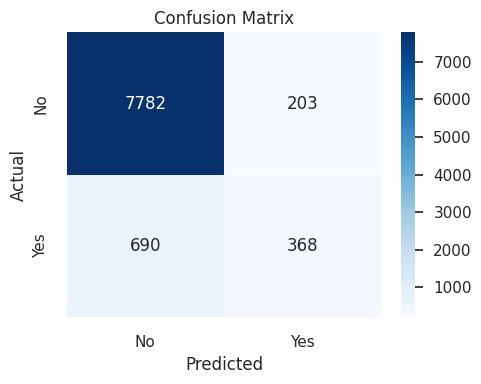

In [11]:
# --- Model Evaluation on Test Set ---

# 1. Predictions
y_pred = model.predict(X_test)

# 2. Classification report
print("=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=["No", "Yes"]))

# 3. Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


In [12]:
# --- Feature Importance: Which Features Drive Response? ---

# Get the trained logistic regression model from the pipeline
log_reg = model.named_steps["classifier"]

# Get feature names from the preprocessor
# 1. Numeric feature names
num_features = numerical_cols

# 2. Categorical feature names after one-hot encoding
cat_encoder = model.named_steps["preprocessor"].named_transformers_["cat"]
cat_feature_names = cat_encoder.get_feature_names_out(categorical_cols)

# Combine all feature names
all_feature_names = np.concatenate([num_features, cat_feature_names])

# Get coefficients from logistic regression
coefficients = log_reg.coef_[0]

# Create a DataFrame for easy viewing
feature_importance = pd.DataFrame({
    "feature": all_feature_names,
    "coefficient": coefficients
})

# Sort by absolute impact
feature_importance["abs_coeff"] = feature_importance["coefficient"].abs()
feature_importance_sorted = feature_importance.sort_values("abs_coeff", ascending=False)

print("Top 20 most influential features (by absolute coefficient):")
display(feature_importance_sorted.head(20))


Top 20 most influential features (by absolute coefficient):


,feature,coefficient,abs_coeff
49,poutcome_success,1.549282,1.549282
42,month_mar,1.457573,1.457573
39,month_jan,-1.321511,1.321511
34,contact_unknown,-1.201578,1.201578
3,duration,1.091874,1.091874
44,month_nov,-0.927599,0.927599
40,month_jul,-0.883044,0.883044
46,month_sep,0.816278,0.816278
47,poutcome_failure,-0.792804,0.792804
50,poutcome_unknown,-0.778145,0.778145


/tmp/ipython-input-2162875855.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


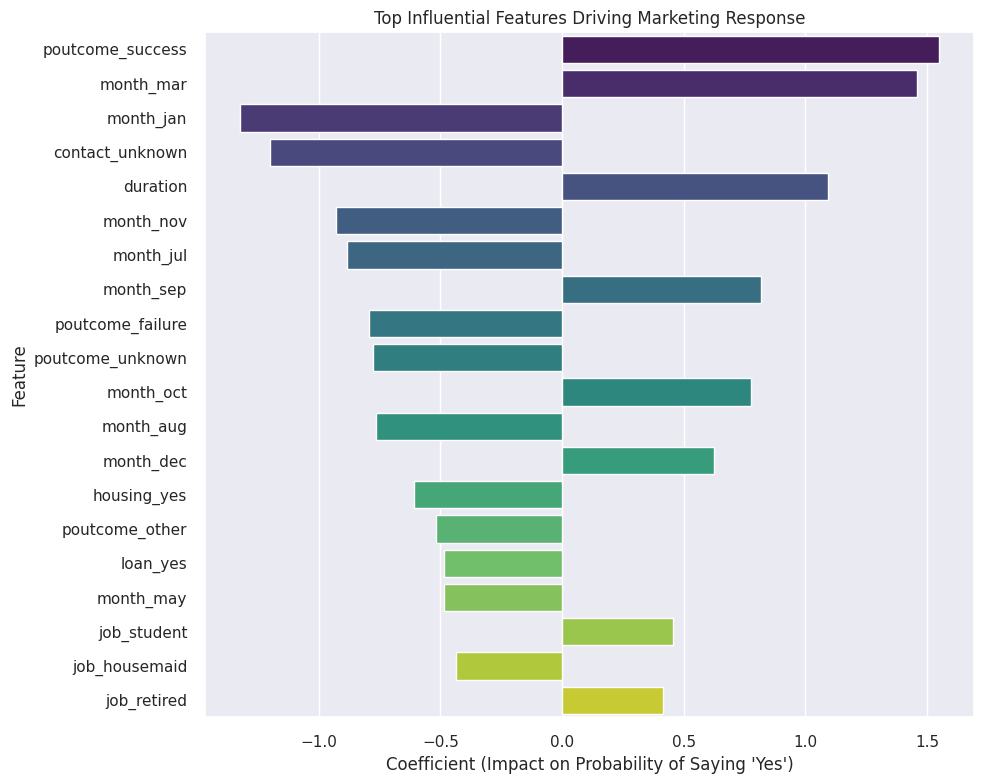

In [13]:
# --- Visualization: Top Feature Importance ---

top_n = 20  # number of features to display
top_features = feature_importance_sorted.head(top_n)

plt.figure(figsize=(10, 8))
sns.barplot(
    data=top_features,
    x="coefficient",
    y="feature",
    palette="viridis"
)
plt.title("Top Influential Features Driving Marketing Response")
plt.xlabel("Coefficient (Impact on Probability of Saying 'Yes')")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [14]:
# --- Save Key Visualizations as PNG Files ---

import os

# Create plots folder
os.makedirs("plots", exist_ok=True)

# 1. Confusion Matrix Heatmap
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.savefig("plots/confusion_matrix.png")
plt.close()


# 2. Top Feature Importance Bar Chart
top_n = 20
top_features = feature_importance_sorted.head(top_n)

plt.figure(figsize=(10, 8))
sns.barplot(
    data=top_features,
    x="coefficient",
    y="feature"
)
plt.title("Top Influential Features Driving Marketing Response")
plt.xlabel("Coefficient (Impact on Probability of Saying 'Yes')")
plt.ylabel("Feature")
plt.tight_layout()
plt.savefig("plots/feature_importance.png")
plt.close()


# 3. Response Rate by Job
if "job" in df.columns:
    job_response = df.groupby("job")["y"].mean().sort_values(ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=job_response.values, y=job_response.index)
    plt.title("Response Rate by Job")
    plt.xlabel("Average Response Rate (P(y = 1))")
    plt.ylabel("Job")
    plt.tight_layout()
    plt.savefig("plots/response_by_job.png")
    plt.close()


# 4. Response Rate by Age Group
if "age" in df.columns:
    df["age_group"] = pd.cut(df["age"], bins=[17, 25, 35, 45, 55, 65, 100],
                             labels=["18–25", "26–35", "36–45", "46–55", "56–65", "65+"])

    age_response = df.groupby("age_group")["y"].mean()

    plt.figure(figsize=(8, 5))
    sns.barplot(x=age_response.index, y=age_response.values)
    plt.title("Response Rate by Age Group")
    plt.xlabel("Age Group")
    plt.ylabel("Average Response Rate (P(y = 1))")
    plt.tight_layout()
    plt.savefig("plots/response_by_age_group.png")
    plt.close()

print("All visualizations saved in the 'plots' folder!")


All visualizations saved in the 'plots' folder!


/tmp/ipython-input-3581237869.py:62: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_response = df.groupby("age_group")["y"].mean()


In [15]:
import shutil

# Zip the 'plots' folder
shutil.make_archive("bank_marketing_plots", "zip", "plots")
print("Zipped plots folder -> bank_marketing_plots.zip")


Zipped plots folder -> bank_marketing_plots.zip
